In [1]:
print("Nguyễn Nguyên Huy - 6351071030")

Nguyễn Nguyên Huy - 6351071030


In [16]:
#import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
'''
1. Nhập dữ liệu, thống kê các thông tin cơ bản, xử lý dữ liệu bị thiếu.
'''
file_path = '/content/drive/MyDrive/Colab Notebooks/Data Mining/Dataset/Mall_Customers.csv'

try:
    df = pd.read_csv(file_path)
    print("Đã đọc dữ liệu thành công!")
except FileNotFoundError:
    print("Lỗi: Không tìm thấy file. Vui lòng kiểm tra lại đường dẫn.")

if 'df' in locals():
    print("\n--- 5 DÒNG ĐẦU TIÊN ---")
    display(df.head())

    print("\n--- THÔNG TIN BỘ DỮ LIỆU (INFO) ---")
    # Kiểm tra kiểu dữ liệu và số lượng non-null
    print(df.info())

    print("\n--- THỐNG KÊ MÔ TẢ (DESCRIBE) ---")
    # Xem trung bình, min, max, độ lệch chuẩn...
    display(df.describe())

    # Xử lý dữ liệu bị thiếu (Missing Values)
    print("\n--- KIỂM TRA DỮ LIỆU THIẾU ---")
    missing_values = df.isnull().sum()
    print(missing_values)

    # Kiểm tra xem có cột nào bị thiếu không
    if missing_values.sum() > 0:
        print("\nPhát hiện dữ liệu thiếu! Đang xử lý...")

        df.dropna(inplace=True)
        print("-> Đã xóa các dòng chứa dữ liệu thiếu.")
    else:
        print("\n Tuyệt vời! Bộ dữ liệu không có giá trị bị thiếu (Clean data).")

Đã đọc dữ liệu thành công!

--- 5 DÒNG ĐẦU TIÊN ---


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



--- THÔNG TIN BỘ DỮ LIỆU (INFO) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

--- THỐNG KÊ MÔ TẢ (DESCRIBE) ---


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000



--- KIỂM TRA DỮ LIỆU THIẾU ---
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

 Tuyệt vời! Bộ dữ liệu không có giá trị bị thiếu (Clean data).


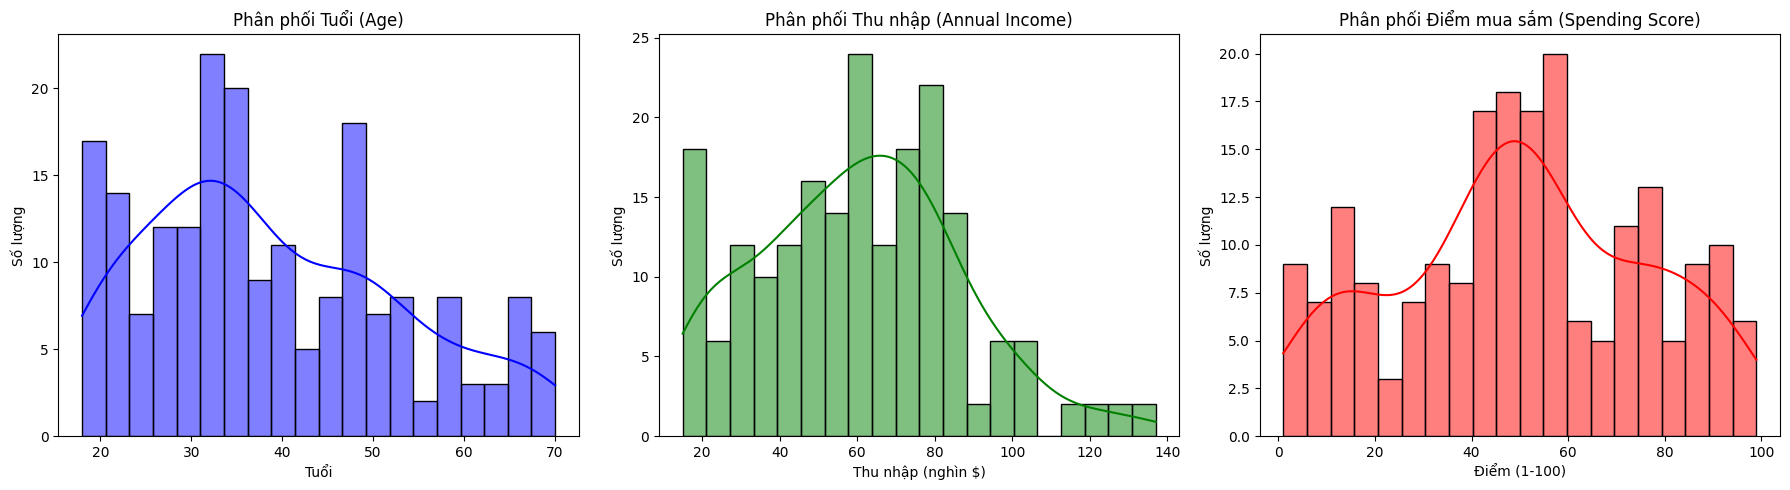

In [7]:
'''
2. Sử dụng biểu đồ tần suất (Histogram) để biểu diễn phân phối của lần lượt các thuộc
tính Tuổi, Thu nhập hằng năm và Số điểm mua sắm.
'''
plt.figure(figsize=(18, 5))

# --- Biểu đồ phân phối TUỔI (Age) ---
plt.subplot(1, 3, 1) # Vị trí 1
# kde=True: Vẽ thêm đường cong mật độ (giúp nhìn rõ hình dáng phân phối)
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title('Phân phối Tuổi (Age)')
plt.xlabel('Tuổi')
plt.ylabel('Số lượng')

# --- Biểu đồ phân phối THU NHẬP (Annual Income) ---
plt.subplot(1, 3, 2) # Vị trí 2
# Lưu ý: Tên cột phải đúng y chang trong file CSV (thường là 'Annual Income (k$)')
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, color='green')
plt.title('Phân phối Thu nhập (Annual Income)')
plt.xlabel('Thu nhập (nghìn $)')
plt.ylabel('Số lượng')

# --- Biểu đồ phân phối ĐIỂM MUA SẮM (Spending Score) ---
plt.subplot(1, 3, 3) # Vị trí 3
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, color='red')
plt.title('Phân phối Điểm mua sắm (Spending Score)')
plt.xlabel('Điểm (1-100)')
plt.ylabel('Số lượng')

plt.tight_layout() # Tự động căn chỉnh khoảng cách cho đẹp
plt.show()

--- THỐNG KÊ SỐ LƯỢNG KHÁCH HÀNG THEO GIỚI TÍNH ---
Gender
Female    112
Male       88
Name: count, dtype: int64

--- TỈ LỆ PHẦN TRĂM ---
Gender
Female    56.0
Male      44.0
Name: proportion, dtype: float64


/tmp/ipython-input-1447392768.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='pastel')


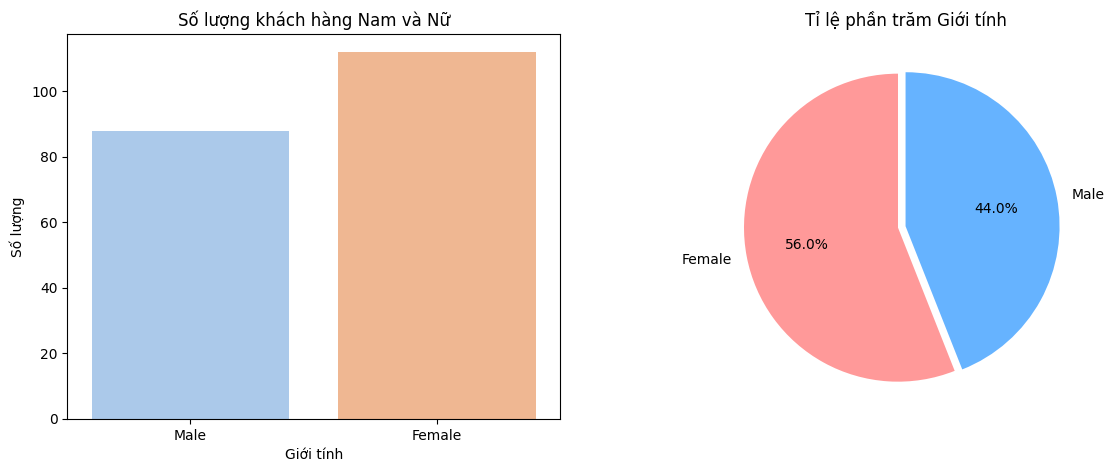

In [8]:
'''
3. Thống kê số mẫu dữ liệu theo thuộc tính Giới tính.
'''
gender_counts = df['Gender'].value_counts()

print("--- THỐNG KÊ SỐ LƯỢNG KHÁCH HÀNG THEO GIỚI TÍNH ---")
print(gender_counts)
print("\n--- TỈ LỆ PHẦN TRĂM ---")
print(df['Gender'].value_counts(normalize=True) * 100)

# Vẽ biểu đồ trực quan
plt.figure(figsize=(14, 5))

# --- Biểu đồ Cột (Bar Chart) ---
plt.subplot(1, 2, 1)
# Dùng countplot để đếm tự động
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Số lượng khách hàng Nam và Nữ')
plt.xlabel('Giới tính')
plt.ylabel('Số lượng')

# --- Biểu đồ Tròn (Pie Chart) ---
plt.subplot(1, 2, 2)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',
        colors=['#ff9999','#66b3ff'], startangle=90, explode=(0.05, 0))
plt.title('Tỉ lệ phần trăm Giới tính')

plt.show()

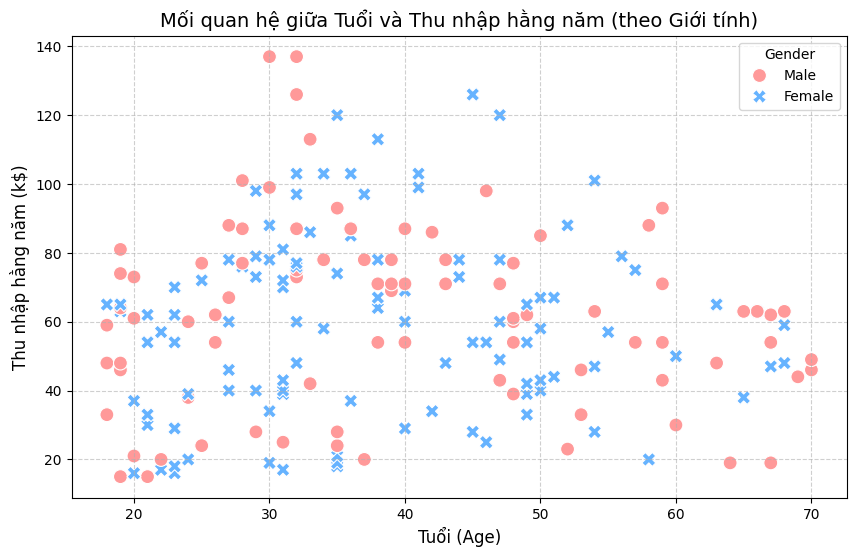

In [9]:
'''
4. Sử dụng biểu đồ phân tán (Scatter plot) để khảo sát phân bố của thuộc tính Tuổi và
Thu nhập hằng năm theo Giới tính.
'''
plt.figure(figsize=(10, 6))

# Vẽ biểu đồ phân tán
# x: Trục hoành (Tuổi)
# y: Trục tung (Thu nhập)
# hue: Phân nhóm màu sắc theo Giới tính
sns.scatterplot(data=df, x='Age', y='Annual Income (k$)',
                hue='Gender', style='Gender',
                s=100, palette=['#ff9999','#66b3ff']) # s=100 là kích thước điểm

plt.title('Mối quan hệ giữa Tuổi và Thu nhập hằng năm (theo Giới tính)', fontsize=14)
plt.xlabel('Tuổi (Age)', fontsize=12)
plt.ylabel('Thu nhập hằng năm (k$)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6) # Thêm lưới mờ cho dễ tra cứu

plt.show()

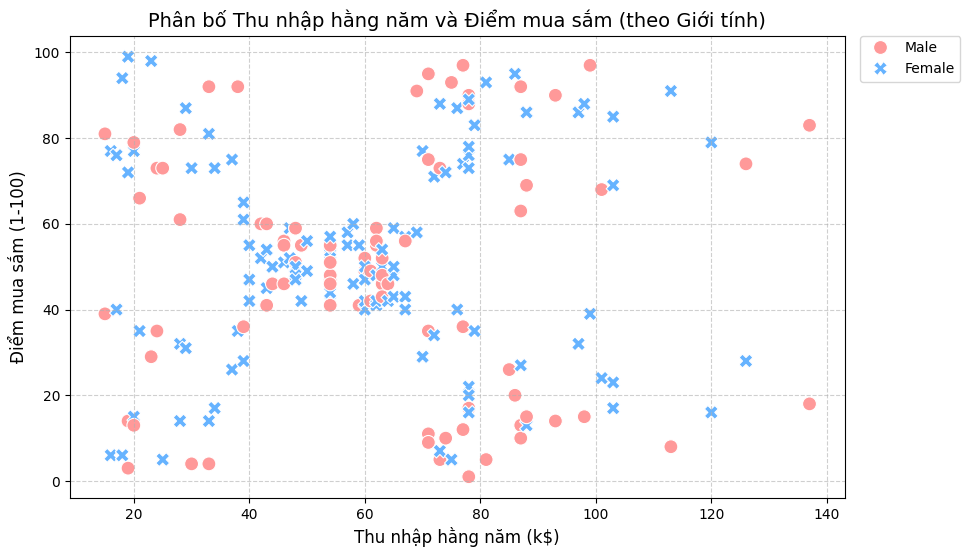

In [10]:
'''
5. Tương tự câu 4, khảo sát thuộc tính Thu nhập hằng năm và Số điểm mua sắm theo
Giới tính.
'''
plt.figure(figsize=(10, 6))

# Vẽ biểu đồ phân tán
# x: Thu nhập
# y: Điểm mua sắm
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Gender', style='Gender',
                s=100, palette=['#ff9999','#66b3ff'])

plt.title('Phân bố Thu nhập hằng năm và Điểm mua sắm (theo Giới tính)', fontsize=14)
plt.xlabel('Thu nhập hằng năm (k$)', fontsize=12)
plt.ylabel('Điểm mua sắm (1-100)', fontsize=12)

# Đặt chú thích (legend) ra ngoài biểu đồ
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

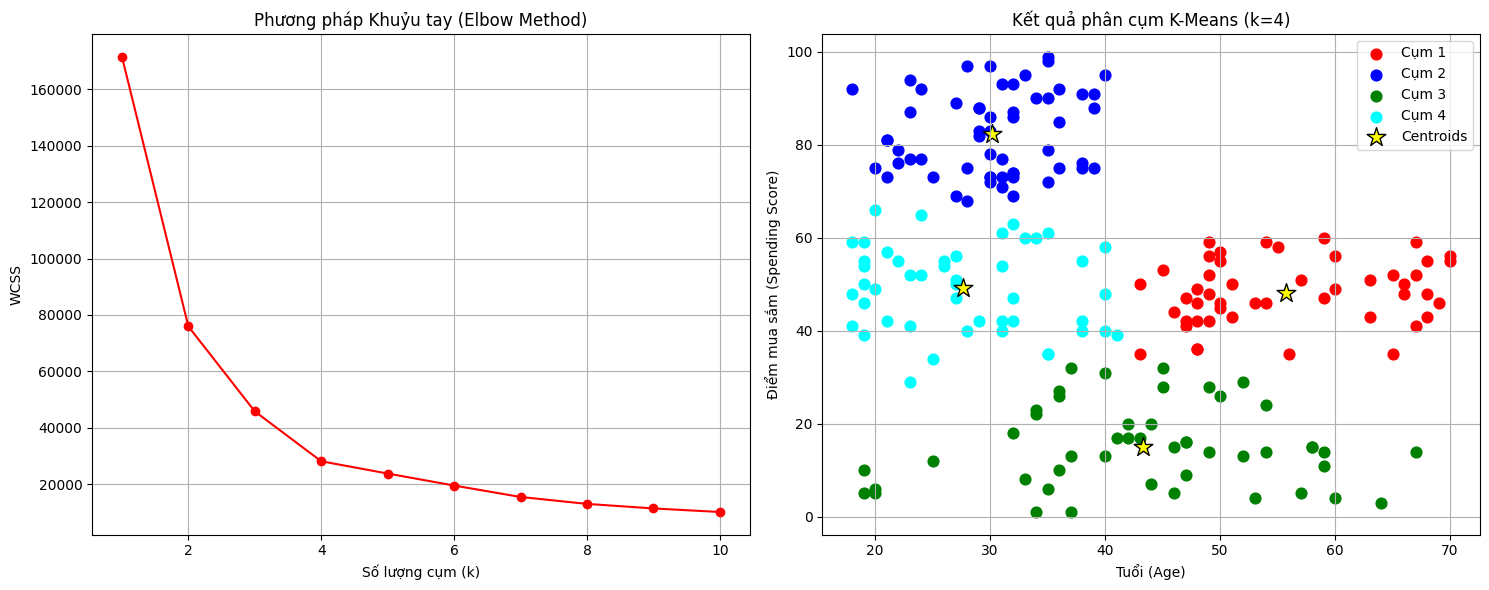

In [14]:
'''
6. Chọn thuộc tính Tuổi và Số điểm mua sắm để gom cụm. Sử dụng phương pháp khuỷu
tay (ELBOW method) để xác định số cụm cần thiết. Tiến hành gom cụm bằng thuật
toán k-Means với số cụm vừa xác định.
'''
X = df[['Age', 'Spending Score (1-100)']].values

# PHƯƠNG PHÁP KHUỶU TAY (ELBOW METHOD)

wcss = [] # Within-Cluster Sum of Square (Tổng bình phương sai số trong cụm)

# Chạy thử K từ 1 đến 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # inertia_ chính là giá trị WCSS

# Vẽ biểu đồ Elbow
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), wcss, marker='o', color='red')
plt.title('Phương pháp Khuỷu tay (Elbow Method)')
plt.xlabel('Số lượng cụm (k)')
plt.ylabel('WCSS')
plt.grid(True)

# TIẾN HÀNH GOM CỤM (K-MEANS)
# Dựa vào biểu đồ Elbow bên trái, ta thường thấy gập khúc ở k=4
k_optimal = 4

kmeans = KMeans(n_clusters=k_optimal, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# Vẽ biểu đồ kết quả phân cụm
plt.subplot(1, 2, 2)

# Vẽ các điểm dữ liệu thuộc từng cụm
# X[y_kmeans == 0, 0] nghĩa là: Lấy các hàng thuộc cụm 0, cột 0 (Age)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=60, c='red', label='Cụm 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=60, c='blue', label='Cụm 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=60, c='green', label='Cụm 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=60, c='cyan', label='Cụm 4')

# Vẽ tâm cụm (Centroids)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='yellow', marker='*', label='Centroids', edgecolors='black')

plt.title(f'Kết quả phân cụm K-Means (k={k_optimal})')
plt.xlabel('Tuổi (Age)')
plt.ylabel('Điểm mua sắm (Spending Score)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

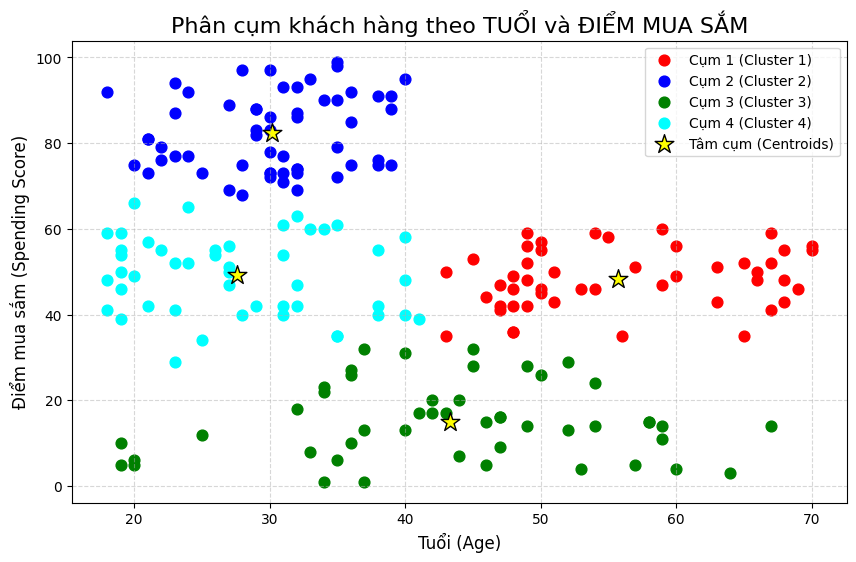

In [17]:
'''
7. Biểu diễn kết quả gom cụm trên bằng biểu đồ.
'''
plt.figure(figsize=(10, 6))

# --- Vẽ các điểm dữ liệu theo từng cụm (Cluster) ---
# Lưu ý: Màu sắc có thể thay đổi tùy lần chạy, nhưng vị trí các cụm là cố định

# Cụm 0
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],
            s=60, c='red', label='Cụm 1 (Cluster 1)')

# Cụm 1
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],
            s=60, c='blue', label='Cụm 2 (Cluster 2)')

# Cụm 2
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s=60, c='green', label='Cụm 3 (Cluster 3)')

# Cụm 3
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1],
            s=60, c='cyan', label='Cụm 4 (Cluster 4)')

# --- Vẽ tâm cụm (Centroids) ---
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='yellow', marker='*',
            label='Tâm cụm (Centroids)', edgecolors='black')

plt.title('Phân cụm khách hàng theo TUỔI và ĐIỂM MUA SẮM', fontsize=16)
plt.xlabel('Tuổi (Age)', fontsize=12)
plt.ylabel('Điểm mua sắm (Spending Score)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

In [18]:
'''
8. Đánh giá kết quả gom cụm bằng Hệ số Dáng điệu (Silhouette coefficient).
'''
score = silhouette_score(X, y_kmeans)

# In kết quả
print("--- KẾT QUẢ ĐÁNH GIÁ SILHOUETTE ---")
print(f"Số lượng cụm (k): {k_optimal}")
print(f"Hệ số Silhouette: {score:.4f}")

# Nhận xét tự động
print("\n--- NHẬN XÉT ---")
if score > 0.5:
    print("=> Kết quả TỐT: Các cụm tách biệt rõ ràng, ít chồng lấn.")
elif score > 0.35:
    print("=> Kết quả KHÁ: Các cụm phân chia tương đối ổn.")
else:
    print("=> Kết quả TRUNG BÌNH/KÉM: Các cụm còn chồng lấn nhiều hoặc dữ liệu quá phân tán.")

--- KẾT QUẢ ĐÁNH GIÁ SILHOUETTE ---
Số lượng cụm (k): 4
Hệ số Silhouette: 0.4997

--- NHẬN XÉT ---
=> Kết quả KHÁ: Các cụm phân chia tương đối ổn.


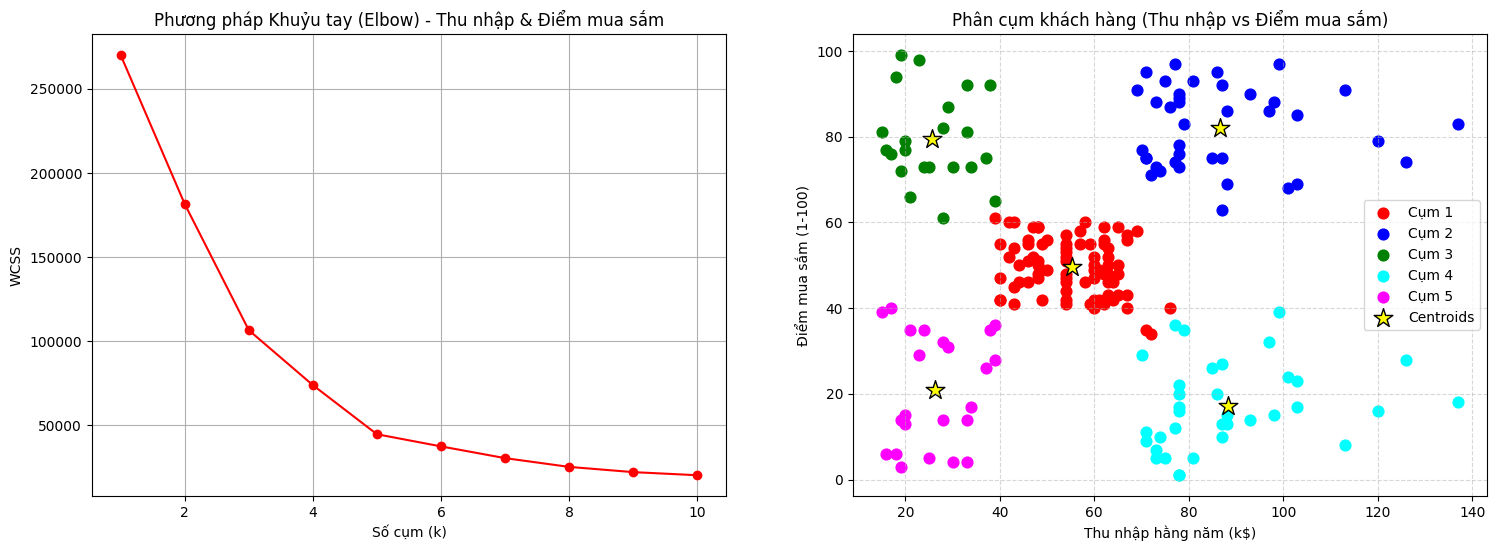

--- ĐÁNH GIÁ (THU NHẬP & ĐIỂM MUA SẮM) ---
Hệ số Silhouette (k=5): 0.5539
=> Kết quả TỐT: Các nhóm tách biệt rất rõ ràng.


In [19]:
'''
9. Thực hiện tương tự câu 6-8 với trường hợp gom cụm theo các thuộc tính:
- Thu nhập hằng năm và Số điểm mua sắm.
- Tuổi, Thu nhập hằng năm và Số điểm mua sắm (thực hiện vẽ biểu đồ 3D để biểu
diễn kết quả gom cụm)
'''
X2 = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# TÌM K TỐI ƯU (ELBOW METHOD)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(18, 6))

# Vẽ biểu đồ Elbow
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), wcss, marker='o', color='red')
plt.title('Phương pháp Khuỷu tay (Elbow) - Thu nhập & Điểm mua sắm')
plt.xlabel('Số cụm (k)')
plt.ylabel('WCSS')
plt.grid(True)

#  PHÂN CỤM K-MEANS (CHỌN K=5)
k_optimal_2 = 5
kmeans_2 = KMeans(n_clusters=k_optimal_2, init='k-means++', random_state=42, n_init=10)
y_kmeans_2 = kmeans_2.fit_predict(X2)

# BIỂU DIỄN KẾT QUẢ
plt.subplot(1, 2, 2)

# Vẽ từng cụm
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
labels = ['Cụm 1', 'Cụm 2', 'Cụm 3', 'Cụm 4', 'Cụm 5']

for i in range(k_optimal_2):
    plt.scatter(X2[y_kmeans_2 == i, 0], X2[y_kmeans_2 == i, 1],
                s=60, c=colors[i], label=labels[i])

# Vẽ tâm cụm
plt.scatter(kmeans_2.cluster_centers_[:, 0], kmeans_2.cluster_centers_[:, 1],
            s=200, c='yellow', marker='*', edgecolors='black', label='Centroids')

plt.title('Phân cụm khách hàng (Thu nhập vs Điểm mua sắm)')
plt.xlabel('Thu nhập hằng năm (k$)')
plt.ylabel('Điểm mua sắm (1-100)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

# ĐÁNH GIÁ SILHOUETTE
score_2 = silhouette_score(X2, y_kmeans_2)
print(f"--- ĐÁNH GIÁ (THU NHẬP & ĐIỂM MUA SẮM) ---")
print(f"Hệ số Silhouette (k={k_optimal_2}): {score_2:.4f}")
if score_2 > 0.5:
    print("=> Kết quả TỐT: Các nhóm tách biệt rất rõ ràng.")

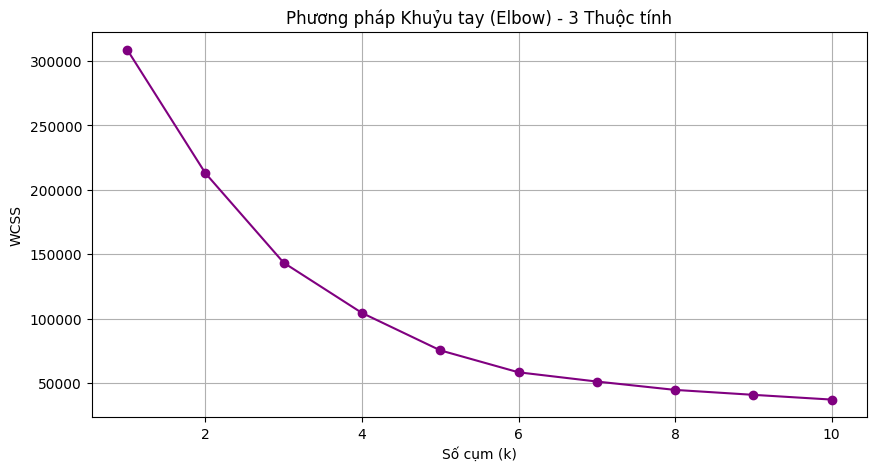

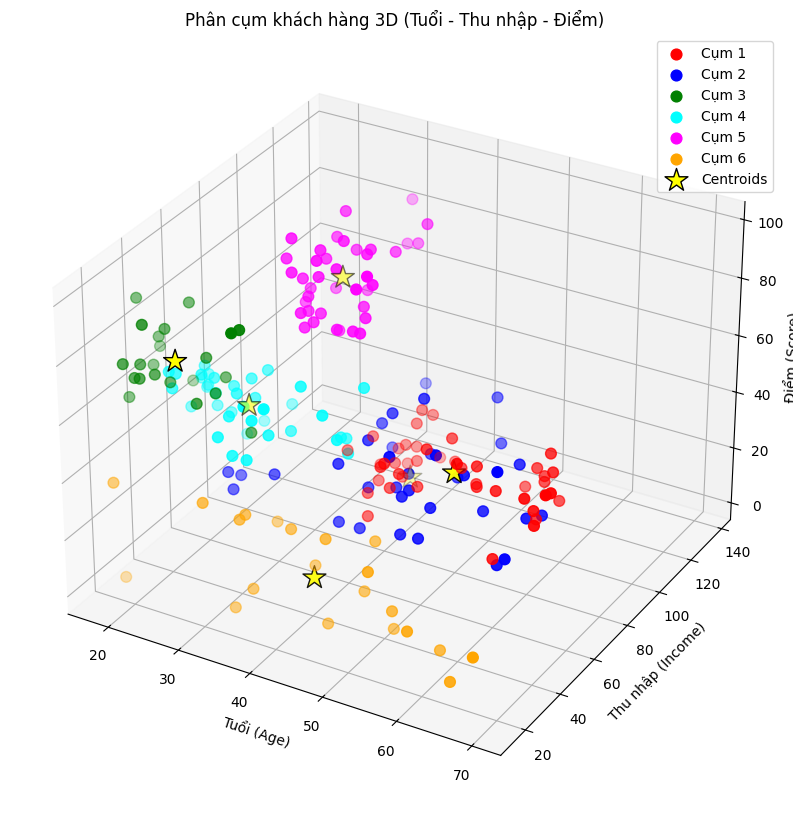

--- ĐÁNH GIÁ (3 THUỘC TÍNH) ---
Hệ số Silhouette (k=6): 0.4523


In [25]:
X3 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

# TÌM K TỐI ƯU (ELBOW)
wcss_3 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X3)
    wcss_3.append(kmeans.inertia_)

# Vẽ Elbow cho trường hợp 3D
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss_3, marker='o', color='purple')
plt.title('Phương pháp Khuỷu tay (Elbow) - 3 Thuộc tính')
plt.xlabel('Số cụm (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# PHÂN CỤM K-MEANS (THƯỜNG CHỌN K=6)
# Với 3 thuộc tính, k thường là 5 hoặc 6. Ta chọn k=6
k_optimal_3 = 6
kmeans_3 = KMeans(n_clusters=k_optimal_3, init='k-means++', random_state=42, n_init=10)
y_kmeans_3 = kmeans_3.fit_predict(X3)

# VẼ BIỂU ĐỒ 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Định nghĩa màu sắc
colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'orange']

# Vẽ từng cụm
for i in range(k_optimal_3):
    ax.scatter(X3[y_kmeans_3 == i, 0],  # Age
               X3[y_kmeans_3 == i, 1],  # Income
               X3[y_kmeans_3 == i, 2],  # Score
               s=60, c=colors[i], label=f'Cụm {i+1}')

# Vẽ tâm cụm
ax.scatter(kmeans_3.cluster_centers_[:, 0],
           kmeans_3.cluster_centers_[:, 1],
           kmeans_3.cluster_centers_[:, 2],
           s=300, c='yellow', marker='*', edgecolors='black', label='Centroids')

ax.set_title('Phân cụm khách hàng 3D (Tuổi - Thu nhập - Điểm)')
ax.set_xlabel('Tuổi (Age)')
ax.set_ylabel('Thu nhập (Income)')
ax.set_zlabel('Điểm (Score)')
ax.legend()

plt.show()

# ĐÁNH GIÁ SILHOUETTE
score_3 = silhouette_score(X3, y_kmeans_3)
print(f"--- ĐÁNH GIÁ (3 THUỘC TÍNH) ---")
print(f"Hệ số Silhouette (k={k_optimal_3}): {score_3:.4f}")